In [1]:
from hkvpy.fews import pi, dataportal
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
wsdl = 'http://www.oms-waddenzee.nl:8081/FewsPiService/fewspiservice?wsdl'
pi.setClient(wsdl)

In [3]:
filters = pi.getFilters()

In [41]:
vars(filters)

{'f_werk': {'description': '',
  'id': 'f_werk',
  'name': 'Uitgevoerde werkzaamheden + peilingen'},
 'f_werk_1': {'description': '',
  'id': 'f_werk.1',
  'name': 'Baggeren + Zandwinning + Agiteren (/baggervak)'},
 'f_werk_2': {'description': '',
  'id': 'f_werk.2',
  'name': 'Verspreiden (/verspreidingsvak)'}}

In [4]:
pi.Filters.f_werk_1['id']

'f_werk.1'

In [42]:
parameters = pi.getParameters(filterId='f_trend.1')#pi.Filters.f_werk_1['id'])

Fault: FewsPiService: Error thrown while getting TimeSeriesHeaders: Filter f_trend.1 is not a valid child of root filter f_werk! Please check the filters.

In [6]:
pi.Parameters.k_m3_gebaggerd_mars['id']

'k.m3.gebaggerd.mars'

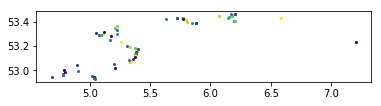

In [7]:
gdf = pi.getLocations(filterId=pi.Filters.f_werk_1['id'], setFormat='gdf')
gdf.plot()

In [8]:
locations = pi.Locations.asGeoDataFrame['locationId'].tolist()

In [34]:
df, entry = pi.getTimeSeries(filterId=pi.Filters.f_werk_1['id'],
                             parameterIds=pi.Parameters.k_m3_gebaggerd_vdlee['id'],
                             locationIds=pi.Locations.asGeoDataFrame['locationId'].tolist(),
                             startTime=datetime(2016,10,24,2, tzinfo=pi.utils.utc_offset(2*60*60)),
                             endTime=datetime(2017,6,29,2, tzinfo=pi.utils.utc_offset(2*60*60)),
                             setFormat='df'
                            )

In [35]:
# df['value'].replace(-999.0,np.NaN, inplace = True)
# level_values = df.index.get_level_values
# result = (df.groupby([level_values(i) for i in [1,2,3,4,5]]
#                       +[pd.Grouper(freq='W', level=0)]).sum())

In [36]:
# method to get year/week labels with an sum aggregation
df['value'].replace(-999.0,np.NaN, inplace = True)
kw = lambda x: x.isocalendar()[1]; 
kw_year = lambda x: str(x.year) + ' - ' + str(x.isocalendar()[1])
level_values = df.index.get_level_values
grouped = (df.groupby([level_values(i) for i in [1,2,3,4,5]]+[level_values(0).map(kw_year)], sort=False,as_index=True ).agg({'value': 'sum'}))
grouped.index.rename(names='date', level=5, inplace=True)
#grouped.reset_index(inplace=True)


In [37]:
entry

'k.m3.gebaggerd.vdlee|bv.1.7.2.1.1.B|m3'

In [38]:
json = grouped.reset_index().to_json(orient='records', date_format='iso')

In [24]:
dataservice = 'http://85.17.82.66/dataservices/'
dataportal.setDataservice(dataservice)

http://85.17.82.66/dataservices/ will be used as portal


In [25]:
database = 'OMSWaddenzee'
dataportal.createDatabase(database)

{'exception': 'database name already exists'}

In [39]:
key = 'k.m3.gebaggerd.vdlee|m3'
dataportal.setEntryDatabase(database, key, json)

{'date': '2017-06-30 12:29:15',
 'id': 'e12f17bb-d762-4312-998c-d304094023cf',
 'key': 'k.m3.gebaggerd.vdlee|m3'}

In [40]:
out = dataportal.getEntryDatabase(database, key)

http://85.17.82.66/dataservices/data.asmx/read?database=OMSWaddenzee&key=k.m3.gebaggerd.vdlee|m3
